<a href="https://colab.research.google.com/github/Kibet-Rotich/MNIST/blob/master/MNIST_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION
My objective for this project is to build a neural network that classiffies numbers from the MNIST dataset, hopefully by extension images with number i wrote myself. i will also explore how I can be able to handle more than one numbers in an image.

In [1]:
import numpy
import tensorflow
import matplotlib

## Dataset loading.

In [2]:
#we are loading the data using the tf dataset loader since the dataset is hosted online

from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocessing

we'll normalize the image pixel values from 0-255 to 0-1 and flatten images from 28 x 28 matrices to just a 784 value vector

we then onehot encode the labels, i,e, if the prediction is 1, we use 0100000000

In [3]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Building the neural network

We’ll use a simple feedforward network:

Input layer: 784 neurons (flattened image)

Hidden layer: 128 neurons, ReLU activation

Output layer: 10 neurons, softmax activation

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [13]:
# compiling the model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
#training the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8778 - loss: 0.4142 - val_accuracy: 0.9620 - val_loss: 0.1218
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9684 - loss: 0.1045 - val_accuracy: 0.9727 - val_loss: 0.0831
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9801 - loss: 0.0643 - val_accuracy: 0.9699 - val_loss: 0.0951
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0474 - val_accuracy: 0.9736 - val_loss: 0.0819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0388 - val_accuracy: 0.9806 - val_loss: 0.0704
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0317 - val_accuracy: 0.9762 - val_loss: 0.0861
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9911 - loss: 0.0269 - val_accuracy: 0.9788 - val_loss: 0.0725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0198 -

## Model evaluation

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.1008
Test Accuracy: 0.9788


In [16]:
#save model
model.save('mnist_model.h5')

We can visualize model training performance using matplotlib

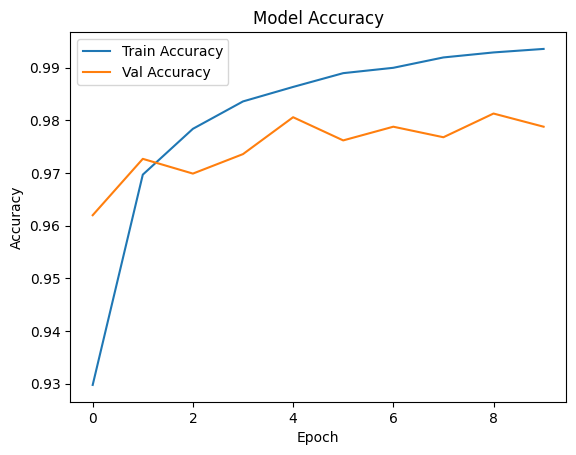

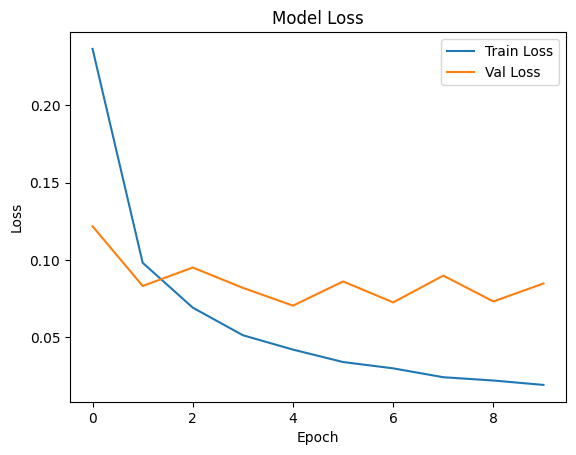

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

We have managed to pull the mnist data and build a neural net with pretty good perfomance. achieving this level of performance with two hidden layers for the mnist dataset is pretty easy according to some books so this was expected. to be able to use this to identify my own hand written numbers will be a whole different process but i can test if it can identify single digit images.

#Real world digits testing

Load and Preprocess the Image
We must preprocess it exactly like MNIST:

Convert to grayscale (if it’s RGB).

Resize to 28×28 pixels.

Invert colors if necessary (MNIST digits are white on black).

Normalize pixel values (0–1).

Flatten into shape (1, 784).

In [10]:
import numpy as np
from PIL import Image

# Load the image
img = Image.open("7.jpg").convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize to MNIST size

# Convert to NumPy array
img_array = np.array(img)

# If background is white and digit is black, invert it
# MNIST digits are white on black
if img_array.mean() > 127:
    img_array = 255 - img_array

# Normalize
img_array = img_array / 255.0

# Flatten
img_array = img_array.reshape(1, 784)




FileNotFoundError: [Errno 2] No such file or directory: '7.jpg'

In [ ]:
#predict image
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 3


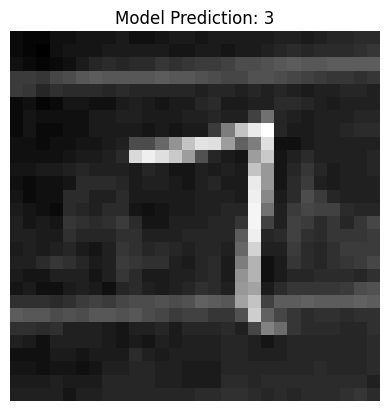

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_array.reshape(28, 28), cmap="gray")
plt.title(f"Model Prediction: {predicted_digit}")
plt.axis("off")
plt.show()


Accuracy on uploaded images: 10.00%


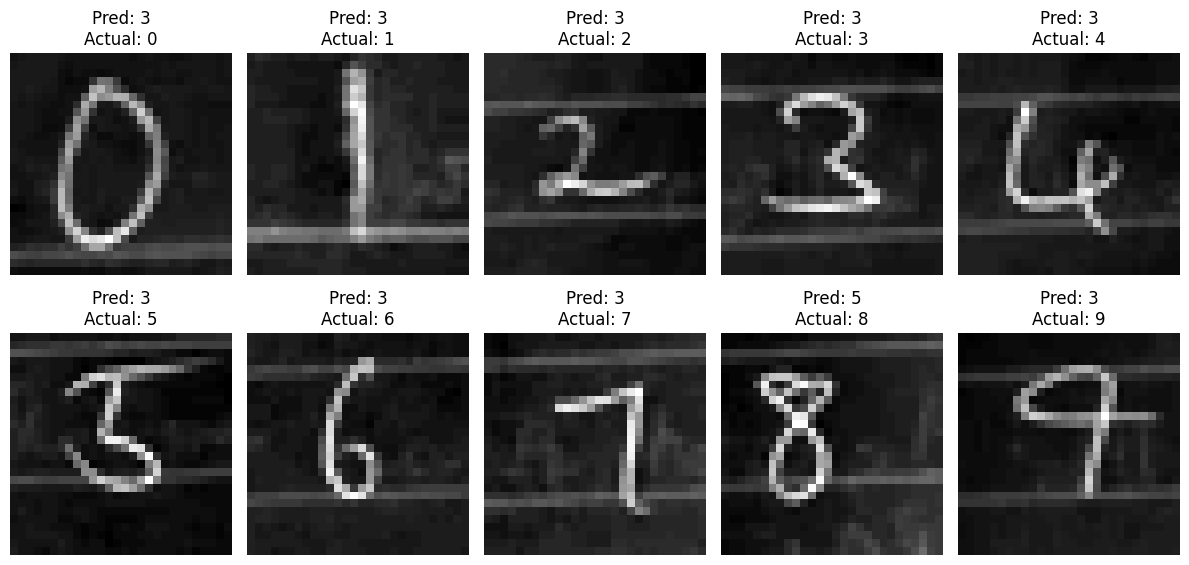

In [ ]:
#loop to do all the numbers and compute accuracy.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import glob
import os



# Initialize counters for accuracy calculation
correct = 0
total = 0

# Get all uploaded image file names (assuming they end with .jpg)
image_files = sorted(glob.glob("*.jpg"))  # sorted so 0.jpg → 9.jpg

#Create a plot grid
plt.figure(figsize=(12, 6))

for idx, file_name in enumerate(image_files):
    # Load & preprocess
    img = Image.open(file_name).convert("L")  # grayscale
    img = img.resize((28, 28))  # MNIST size
    img_array = np.array(img)

    # Invert if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0  # normalize
    img_array_flat = img_array.reshape(1, 784)  # flatten for model

    # Predict
    prediction = model.predict(img_array_flat, verbose=0)
    predicted_digit = np.argmax(prediction)

    # Get actual digit from filename (e.g., "3.jpg" → 3)
    actual_digit = int(os.path.splitext(file_name)[0])

    # Count for accuracy
    if predicted_digit == actual_digit:
        correct += 1
    total += 1

    # Plot processed image with prediction
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_array, cmap="gray")
    plt.title(f"Pred: {predicted_digit}\nActual: {actual_digit}")
    plt.axis("off")

# 5. Show accuracy
accuracy = correct / total
print(f"Accuracy on uploaded images: {accuracy * 100:.2f}%")

plt.tight_layout()
plt.show()


The model doesnt behave as expected after seeing new data. a possible explanation would be the parallel lines in the images from a single lined book, I'll try on a clear surface before we try to look for another solution.

Accuracy on uploaded images: 30.00%


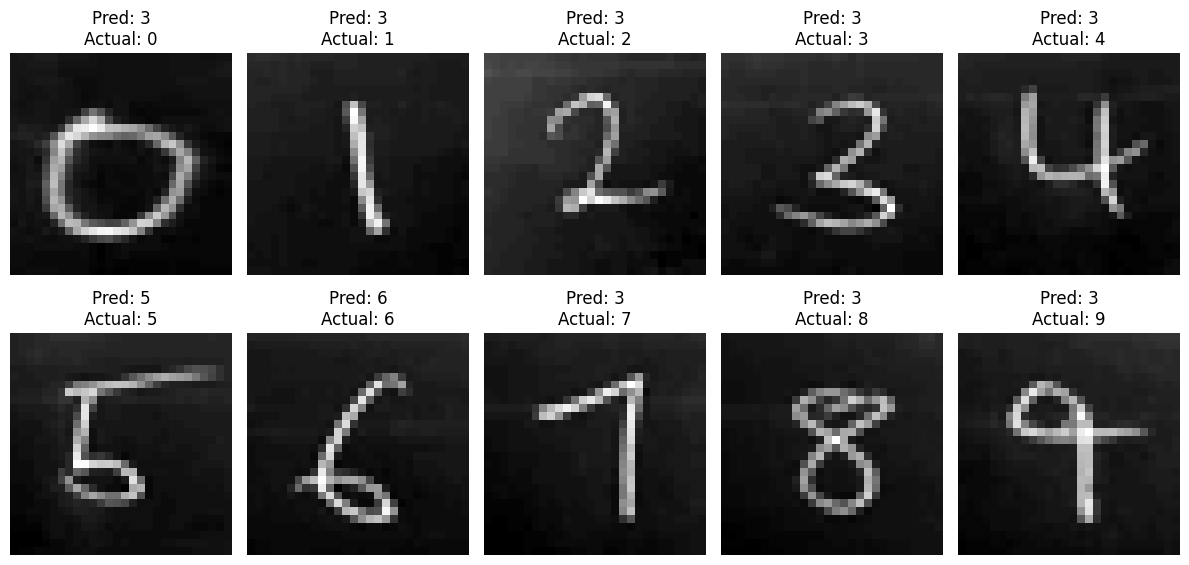

In [ ]:
#loop to do all the numbers and compute accuracy.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import glob
import os



# Initialize counters for accuracy calculation
correct = 0
total = 0

# Get all uploaded image file names (assuming they end with .jpg)
image_files = sorted(glob.glob("*.jpg"))  # sorted so 0.jpg → 9.jpg

#Create a plot grid
plt.figure(figsize=(12, 6))

for idx, file_name in enumerate(image_files):
    # Load & preprocess
    img = Image.open(file_name).convert("L")  # grayscale
    img = img.resize((28, 28))  # MNIST size
    img_array = np.array(img)

    # Invert if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0  # normalize
    img_array_flat = img_array.reshape(1, 784)  # flatten for model

    # Predict
    prediction = model.predict(img_array_flat, verbose=0)
    predicted_digit = np.argmax(prediction)

    # Get actual digit from filename (e.g., "3.jpg" → 3)
    actual_digit = int(os.path.splitext(file_name)[0])

    # Count for accuracy
    if predicted_digit == actual_digit:
        correct += 1
    total += 1

    # Plot processed image with prediction
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_array, cmap="gray")
    plt.title(f"Pred: {predicted_digit}\nActual: {actual_digit}")
    plt.axis("off")

# 5. Show accuracy
accuracy = correct / total
print(f"Accuracy on uploaded images: {accuracy * 100:.2f}%")

plt.tight_layout()
plt.show()


That helped a little bit, improved accuracy to 30%, lets explore how we can improve this.

#Fine tuning model with my own images

In [ ]:
import os
import re
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# === CONFIG ===
custom_data_path = "."  # folder containing all your renamed images
model_path = "mnist_model.h5"         # your trained MNIST model

# === LOAD AND PREPROCESS CUSTOM IMAGES ===
images = []
labels = []

for file_name in os.listdir(custom_data_path):
    if file_name.lower().endswith(".jpg"):
        # Extract label (last number in file name)
        match = re.search(r'(\d+)(?=\.jpg$)', file_name)
        if match:
            label = int(match.group(1))

            # Load image as grayscale and resize to 28x28
            img = load_img(os.path.join(custom_data_path, file_name), color_mode="grayscale", target_size=(28, 28))
            img_array = img_to_array(img).astype("float32") / 255.0

            images.append(img_array)
            labels.append(label)

images = np.array(images)
labels = to_categorical(np.array(labels), num_classes=10)

# Flatten images to match the model's input shape
images = images.reshape(images.shape[0], -1)


# === LOAD MODEL ===
model = load_model(model_path)

# === FINE-TUNE MODEL ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Recompile model
model.fit(images, labels, epochs=5, batch_size=4, validation_split=0.2)

# === SAVE UPDATED MODEL ===
model.save("mnist_model_finetuned.h5")
print("Fine-tuned model saved as mnist_model_finetuned.h5")

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.0190 - loss: 20.4891 - val_accuracy: 0.0000e+00 - val_loss: 8.3001
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2071 - loss: 6.9872 - val_accuracy: 0.0000e+00 - val_loss: 7.5081
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0577 - loss: 5.0996 - val_accuracy: 0.0000e+00 - val_loss: 5.3343
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0935 - loss: 3.4910 - val_accuracy: 0.0000e+00 - val_loss: 5.5154
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0577 - loss: 3.7892 - val_accuracy: 0.0000e+00 - val_loss: 4.1048


Fine-tuned model saved as mnist_model_finetuned.h5


single_rule Accuracy: 10.00% (1/10)
clear_paper Accuracy: 10.00% (1/10)


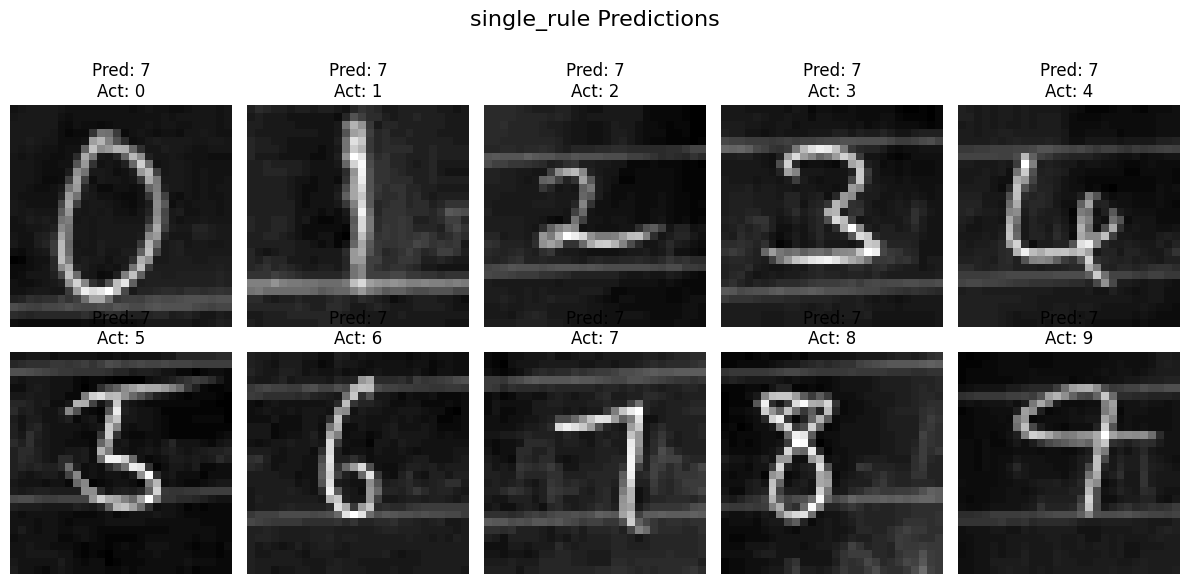

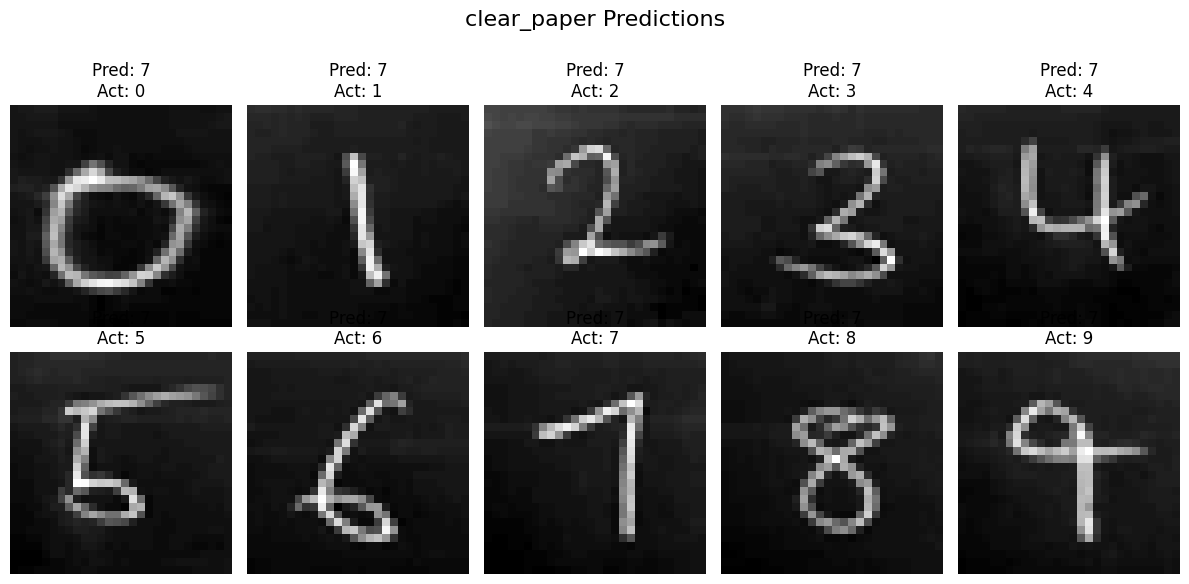

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import re

# Initialize counters for each category
results = {
    "single_rule": {"correct": 0, "total": 0, "files": []},
    "clear_paper": {"correct": 0, "total": 0, "files": []}
}

# Get all JPG files in current directory only
image_files = sorted([f for f in glob.glob("*.jpg") if os.path.isfile(f)])

# Loop over files
for file_name in image_files:
    # Load & preprocess
    img = Image.open(file_name).convert("L")  # grayscale
    img = img.resize((28, 28))  # MNIST size
    img_array = np.array(img)

    # Invert if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0  # normalize
    img_array_flat = img_array.reshape(1, 784)  # flatten for model

    # Predict
    prediction = model.predict(img_array_flat, verbose=0)
    predicted_digit = np.argmax(prediction)

    # Extract actual digit from filename
    match = re.search(r'(\d+)(?=\.jpg$)', file_name)
    if not match:
        continue
    actual_digit = int(match.group(1))

    # Determine category
    if file_name.lower().startswith("single_rule"):
        category = "single_rule"
    elif file_name.lower().startswith("clear_paper"):
        category = "clear_paper"
    else:
        continue  # skip unknown naming

    # Update accuracy counters
    if predicted_digit == actual_digit:
        results[category]["correct"] += 1
    results[category]["total"] += 1

    # Store for plotting later
    results[category]["files"].append((file_name, img_array, predicted_digit, actual_digit))

# Print accuracy per category
for category in results:
    total = results[category]["total"]
    correct = results[category]["correct"]
    acc = (correct / total * 100) if total > 0 else 0
    print(f"{category} Accuracy: {acc:.2f}% ({correct}/{total})")

# Plot images per category
for category in results:
    files = results[category]["files"]
    if not files:
        continue

    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{category} Predictions", fontsize=16)

    for idx, (fname, img_array, pred, actual) in enumerate(files):
        plt.subplot(2, 5, idx + 1)
        plt.imshow(img_array, cmap="gray")
        plt.title(f"Pred: {pred}\nAct: {actual}")
        plt.axis("off")

        if idx >= 9:  # only show first 10 per category
            break

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Looks like that made things worse. 😆. The more you know, we'll explore other methods in future.


# convolutional neural nets

CNNs outperform plain ANNs on images because they’re designed to exploit the structure of visual data instead of treating it like a random pile of numbers.

Here’s why:

1. Local Connectivity (Seeing small regions first)
In an ANN, every neuron in one layer connects to every neuron in the next layer — it treats all pixels as equally related, even if they’re far apart in the image.
In a CNN, each neuron only looks at a small patch of the image at a time (e.g., 3×3 pixels).
This mimics how your eyes work — you recognize shapes locally before combining them into bigger patterns.

2. Weight Sharing (Reusing the same “detector” everywhere)
A CNN uses the same filter (set of weights) across the whole image.
If one filter detects a vertical edge in the top-left corner, it can also detect vertical edges in the bottom-right corner without learning it again.
This makes CNNs much more memory-efficient and less prone to overfitting than ANNs for images.

3. Translation Invariance (Recognizing things anywhere)
In an ANN, if you shift a number “2” from the center to the corner of the image, the network may think it’s a different pattern entirely.
CNNs learn features that don’t depend on the position — they recognize “eyes” whether they’re at the top or bottom of the image.

4. Hierarchical Feature Learning
Early CNN layers detect basic features (edges, corners, colors).
Middle layers detect patterns (circles, textures, strokes).
Later layers detect objects (digits, faces, cats).
ANNs don’t naturally learn this progressive feature hierarchy — they just mix all pixels in one go, which loses spatial structure.

5. Better Scalability
For a 28×28 image (MNIST), an ANN fully connected to the next layer might already need hundreds of thousands of weights.
CNNs drastically reduce this with small filters (e.g., a 3×3 filter has only 9 weights, no matter how big the image).
This makes them faster, lighter, and more accurate.

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# CNNs expect 4D input: (samples, height, width, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0



In [20]:
# 2. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9044 - loss: 0.3147 - val_accuracy: 0.9827 - val_loss: 0.0544
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9894 - val_loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9868 - val_loss: 0.0415
313/313 - 3s - 11ms/step - accuracy: 0.9868 - loss: 0.0415

Test accuracy: 0.9868


In [21]:
# Save the model
model.save('mnist_cnn_model.h5')
print("CNN model saved as mnist_cnn_model.h5")

CNN model saved as mnist_cnn_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Accuracy: 75.00%


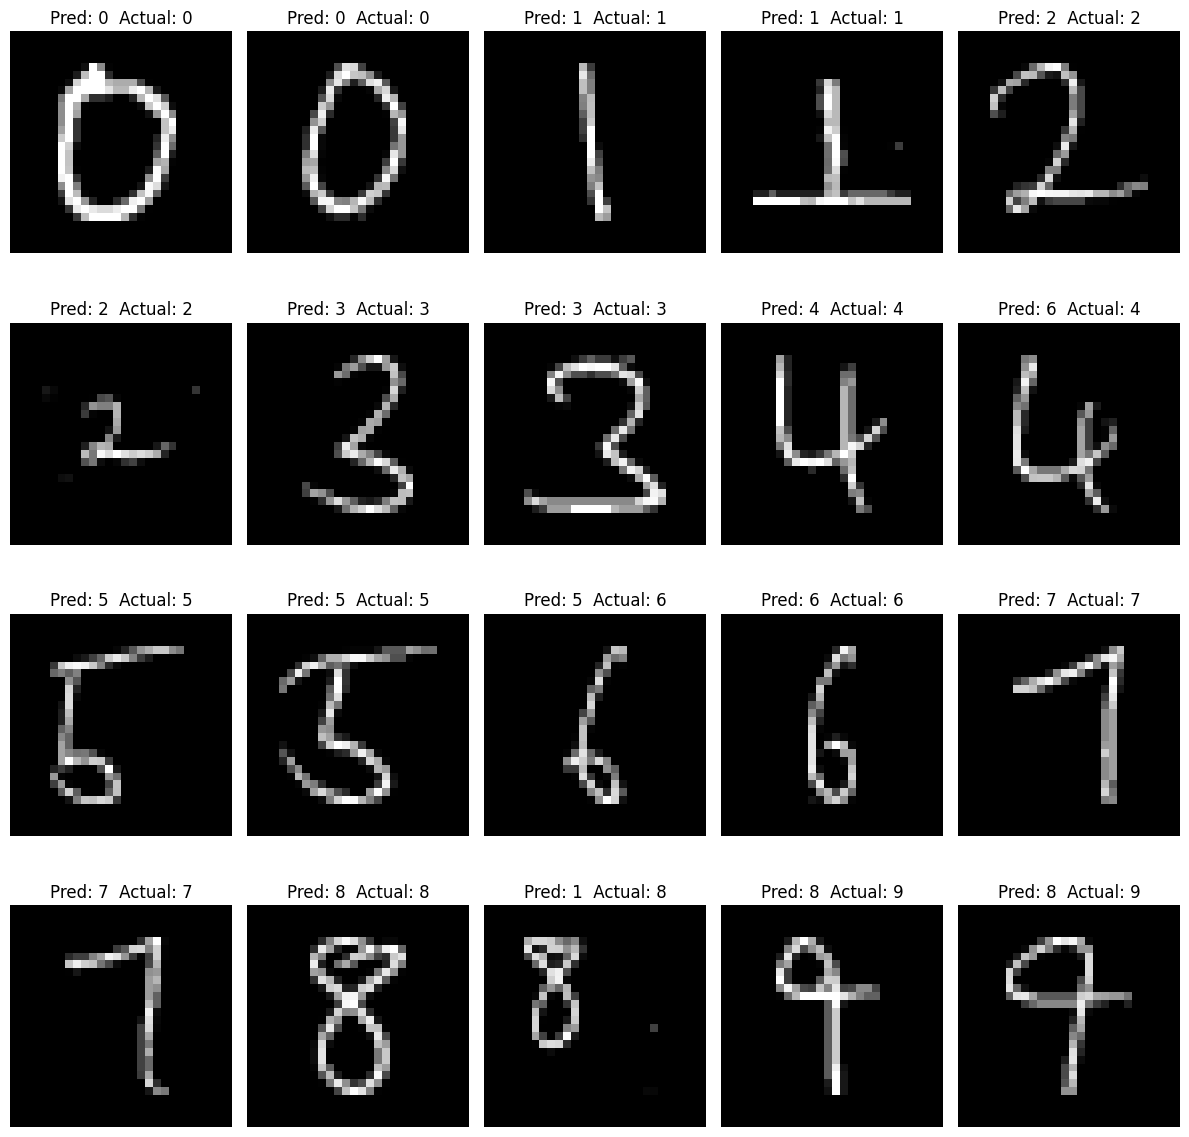

In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model (adjust path if needed)
model = load_model("mnist_cnn_model.h5")  # Save your model after training with model.save(...)

# Folder where your handwritten images are saved
image_folder = ""  # change if your images are in a subfolder

# Prepare image file names
clear_paper_files = [f"clear_paper {i}.jpg" for i in range(10)]
single_ruled_files = [f"single_rule {i}.jpg" for i in range(10)]
all_files = clear_paper_files + single_ruled_files

# True labels (0–9 repeated twice)
true_labels = list(range(10)) + list(range(10))

# Preprocess function
def preprocess_mnist_style(image_path):
    """
    Preprocess an image to match MNIST format:
    - Convert to grayscale
    - Invert colors if needed
    - Resize to 28x28 without distortion (keep aspect ratio)
    - Normalize pixel values to [0, 1]
    """
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image was loaded successfully
    if img is None:
        print(f"Warning: Could not load image {image_path}. Skipping.")
        return None

    # Invert colors if background is dark (MNIST digits are white on black)
    if np.mean(img) > 127:
        img = cv2.bitwise_not(img)

    # Threshold to remove noise
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find bounding box of the digit
    coords = cv2.findNonZero(img)
    if coords is None:
        print(f"Warning: Could not find digit in image {image_path}. Skipping.")
        return None
    x, y, w, h = cv2.boundingRect(coords)

    # Crop to digit
    img = img[y:y+h, x:x+w]

    # Resize while keeping aspect ratio
    # Scale to fit 20x20 box
    if w > h:
        new_w = 20
        new_h = int(h * (20.0 / w))
    else:
        new_h = 20
        new_w = int(w * (20.0 / h))
    img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Pad to 28x28
    top = (28 - new_h) // 2
    bottom = 28 - new_h - top
    left = (28 - new_w) // 2
    right = 28 - new_w - left
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

    # Normalize to [0, 1]
    img = img.astype('float32') / 255.0

    # Reshape to match CNN input (1 channel)
    img = np.expand_dims(img, axis=-1)

    return img

# Example: preprocessing and stacking predictions
images = []
labels = []
processed_images_for_plotting = [] # Store processed images for plotting

for label in range(10):
    for style in ["clear_paper", "single_rule"]:
        path = f"{style} {label}.jpg"
        img = preprocess_mnist_style(path)
        if img is not None: # Only append if image was loaded and processed successfully
            images.append(img)
            labels.append(label)
            processed_images_for_plotting.append(img.reshape(28, 28)) # Store for plotting

images = np.array(images)
labels = np.array(labels)

# Check if any images were processed before predicting
if len(images) > 0:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    accuracy = np.mean(predicted_labels == labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Plot results
    plt.figure(figsize=(12, int(np.ceil(len(processed_images_for_plotting)/5)) * 3)) # Adjust figure size based on number of images
    for i in range(len(processed_images_for_plotting)):
        plt.subplot(int(np.ceil(len(processed_images_for_plotting)/5)), 5, i+1) # Adjust subplot grid
        plt.imshow(processed_images_for_plotting[i], cmap='gray')
        plt.title(f"Pred: {predicted_labels[i]}  Actual: {labels[i]}") # Use labels list for actual
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images were processed successfully.")